# <p style="text-align: center;"> <b> Exploring and Pre-processing Data </b></p>
---

## **Table of Contents**



---

# Import Libraries <a class="anchor" id="import"></a>

In [53]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load dataset

In [54]:
df = pd.read_csv('data/dataset.csv',index_col=0)
df.sample(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
99534,3VDcmJe6TSGy3MfjhHdDOX,Sara Kays,Low-Key Hits,When You Look at Me,0,170375,False,0.641,0.293,2,-10.711,1,0.0291,0.8360,0.000000,0.2170,0.373,129.849,4,singer-songwriter
34902,51zYM75QpfX88S54mRtfgH,Salim–Sulaiman;Sunidhi Chauhan,The Fame Game 'Music From The Netflix Series',Dupatta Mera,37,178606,False,0.721,0.942,6,-1.145,0,0.0779,0.0783,0.000017,0.0612,0.834,125.009,4,folk
33141,1T1ihaGSLwkC2x0jaYodIp,For Revenge;Danindra DIVIDE,Get Closer with For Revenge,Serana,51,244153,False,0.489,0.404,2,-12.445,1,0.0332,0.1010,0.000068,0.2550,0.311,129.992,4,emo
36051,6UqRGwjwYL0stXbaodTxwo,Tez Cadey,Seve (Radio Edit),Seve - Radio Edit,69,210853,False,0.740,0.831,5,-7.321,1,0.0456,0.4440,0.003040,0.0769,0.448,121.034,4,french
80813,3vjkllvtOIKpVvXSWsu1ta,A.R. Rahman;Sanah Moidutty,Mohenjo Daro,Tu Hai,57,238688,False,0.499,0.541,11,-10.463,1,0.0448,0.7440,0.001670,0.0579,0.381,81.198,4,pop-film


# 1. Basic information

## How many rows and columns?

In [55]:
ncols, nrows = df.shape
print(f'Dataset has {ncols} columns and {nrows} rows')

Dataset has 114000 columns and 20 rows


## What is the meaning of each row?

Each row in the Spotify track dataset represents the information of a single song from Spotify. The dataset includes identification information such as `track_id`, `track_name`, `artists`... and various audio features like `danceability`, `energy`, `loudness`, `speechiness`...

## Are there duplicated rows?

We will check for the number of duplicated rows, and if any are found, we will drop them

In [56]:
duplicated_rows = df.duplicated().sum()

if duplicated_rows == 0:
    print('There are 0 rows that are duplicated, which means each row in the DataFrame is unique.')
    print('So that we do not need to continue processing duplicate lines')
else:
    print(f'There are {duplicated_rows} rows that are duplicated so we need to drop those {duplicated_rows} rows')
    df = df.drop_duplicates()
    print(f'After drop duplicated rows, there are {df.shape[0]} rows left')

There are 450 rows that are duplicated so we need to drop those 450 rows
After drop duplicated rows, there are 113550 rows left


## What is the meaning of each colum?

| Column          | Description                                                                                                                    |
|-----------------|--------------------------------------------------------------------------------------------------------------------------------|
| `track_id`      | The Spotify ID for the track                                                                                                   |
| `artists`       | The names of the artists who performed the track, separated by ';' if there is more than one artist                               |
| `album_name`    | The name of the album in which the track appears                                                                              |
| `track_name`    | The name of the track                                                                                                          |
| `popularity`    | The popularity of the track on a scale from 0 to 100, based on the total number of plays and recency                             |
| `duration_ms`   | The length of the track in milliseconds                                                                                        |
| `explicit`      | Indicates whether the track has explicit lyrics (true = yes, false = no or unknown)                                           |
| `danceability`  | Describes how suitable a track is for dancing, with 0.0 being least danceable and 1.0 being most danceable                     |
| `energy`        | A measure from 0.0 to 1.0 representing the intensity and activity of the track                                                |
| `key`           | The key the track is in, mapped to pitches using standard Pitch Class notation                                                |
| `loudness`      | The overall loudness of the track in decibels (dB)                                                                            |
| `mode`          | Indicates the modality (major = 1, minor = 0) of a track's melodic content                                                    |
| `speechiness`   | Detects the presence of spoken words in a track, with values above 0.66 likely indicating spoken words                          |
| `acousticness`  | A confidence measure from 0.0 to 1.0 of whether the track is acoustic                                                         |
| `instrumentalness` | Predicts whether a track contains no vocals, with values closer to 1.0 indicating instrumental tracks                         |
| `liveness`      | Detects the presence of an audience in the recording, with higher values indicating a greater likelihood of a live performance |
| `valence`       | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track                                              |
| `tempo`         | The overall estimated tempo of a track in beats per minute (BPM)                                                               |
| `time_signature`| An estimated time signature, indicating how many beats are in each bar                                                          |
| `track_genre`   | The genre in which the track belongs                                                                                          |


## What is the current data type of each column? Are there any columns having inappropriate data types?

First, we will use dtypes to explore the data types of columns in the dataset

In [57]:
df.dtypes.to_frame('Data Type')

,Data Type
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64
key,int64


To better understand columns of type `object`, we will analyze them into each subtype using function `open_object_dtype()`

In [58]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(s.apply(type))
    return dtypes

obj_cols = df.select_dtypes(include='object').columns
df[obj_cols].apply(open_object_dtype, axis=0).to_frame('Data Type')


,Data Type
track_id,{<class 'str'>}
artists,"{<class 'str'>, <class 'float'>}"
album_name,"{<class 'str'>, <class 'float'>}"
track_name,"{<class 'str'>, <class 'float'>}"
track_genre,{<class 'str'>}


We can observe that there are three columns with inappropriate data types:

- `artists`, `album_name`, `track_name`: they contain a mix of str and float types.

This inconsistency might be due to the presence of `NaN` values in these columns, as `NaN` is of type `float`

## Missing values in each row

We check for missing values in each row. Since the dataset has 20 columns, if any row has more than 10 missing values, we will drop that row.

In [59]:
# Missing values in each row
missing_values_per_row = df.isnull().sum(axis=1)
count_per_missing_value = missing_values_per_row.value_counts().sort_index()

# Print the results
for missing, rows in count_per_missing_value.items():
    print(f'{rows} row(s) have {missing} missing values')

total_rows_with_missing_values = (df.isnull().any(axis=1)).sum()
print(f'Total number of rows with missing values: {total_rows_with_missing_values}')

113549 row(s) have 0 missing values
1 row(s) have 3 missing values
Total number of rows with missing values: 1


So, all rows have no missing values except for one row with 3 missing values. We will handle this particular row in the subsequent section.

# **2. Data Distribution**

## 2.1 Numerical columns

We need to extract all numerical columns and store them in the variable `numerical_cols`

In [60]:
numerical_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]
numerical_cols.shape

(113550, 14)

There are 14 numerical columns, let's see 5 sample rows of them

In [61]:
numerical_cols.sample(5)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
101544,36,98717,0.526,0.0187,0,-17.118,1,0.1500,0.992,0.880000,0.1080,0.5280,134.248,4
75905,20,311213,0.450,0.1020,5,-22.859,1,0.0377,0.904,0.933000,0.0967,0.0797,144.004,3
67798,0,212346,0.575,0.5070,3,-7.476,1,0.0275,0.419,0.000023,0.1030,0.2380,144.081,4
76643,22,179893,0.412,0.1650,6,-16.907,1,0.0572,0.980,0.000041,0.1300,0.3140,122.892,4
39740,39,192219,0.650,0.6360,6,-4.994,0,0.0447,0.210,0.000000,0.2260,0.3390,94.933,4


#### What is the percentage of missing values?

To start our analysis, we first examined the numerical columns using the `info()` method.

In [62]:
numerical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113550 non-null  int64  
 1   duration_ms       113550 non-null  int64  
 2   danceability      113550 non-null  float64
 3   energy            113550 non-null  float64
 4   key               113550 non-null  int64  
 5   loudness          113550 non-null  float64
 6   mode              113550 non-null  int64  
 7   speechiness       113550 non-null  float64
 8   acousticness      113550 non-null  float64
 9   instrumentalness  113550 non-null  float64
 10  liveness          113550 non-null  float64
 11  valence           113550 non-null  float64
 12  tempo             113550 non-null  float64
 13  time_signature    113550 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 13.0 MB


Subsequently, we calculated the minimum and maximum values for each numerical column, along with the corresponding percentage of missing values.

But in the `key` column (song key), there will be a value of -1 if the key of the song cannot be determined. Therefore, we will calculate the number of missing values in the column by counting the number of -1 values in the 'key' column

In [63]:
dist_numerical_cols = numerical_cols.describe().T[['min', 'max']]
dist_numerical_cols['Missing Values'] = numerical_cols.isnull().sum()
dist_numerical_cols['Missing Percentage'] = (numerical_cols.isnull().mean() * 100).round(2)
# The number of -1 values in the 'key' column
dist_numerical_cols.loc['key', 'Missing Values'] = (df['key'] == -1).sum()
dist_numerical_cols

,min,max,Missing Values,Missing Percentage
popularity,0.000,100.000,0,0.0
duration_ms,0.000,5237295.000,0,0.0
danceability,0.000,0.985,0,0.0
energy,0.000,1.000,0,0.0
key,0.000,11.000,0,0.0
loudness,-49.531,4.532,0,0.0
mode,0.000,1.000,0,0.0
speechiness,0.000,0.965,0,0.0
acousticness,0.000,0.996,0,0.0
instrumentalness,0.000,1.000,0,0.0


The output shows that all numeric columns have a missing value percentage of 0, indicating that **there are no missing values** in these columns.

To gain further insights into the data, we used the `describe()` method to generate a comprehensive statistical summary of the numerical columns.

In [64]:
numerical_cols.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113550.000000,1.135500e+05,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000
mean,33.324139,2.280794e+05,0.567031,0.642090,5.309467,-8.243419,0.637860,0.084674,0.314067,0.155702,0.213611,0.474207,122.175888,3.904218
std,22.283976,1.064148e+05,0.173408,0.251052,3.560134,5.011401,0.480621,0.105761,0.331907,0.309216,0.190461,0.259204,29.972861,0.432115
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741802e+05,0.456000,0.473000,2.000000,-9.997750,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296500,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615878e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048675,0.273000,0.683000,140.073750,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


**Distribution of numerical columns**

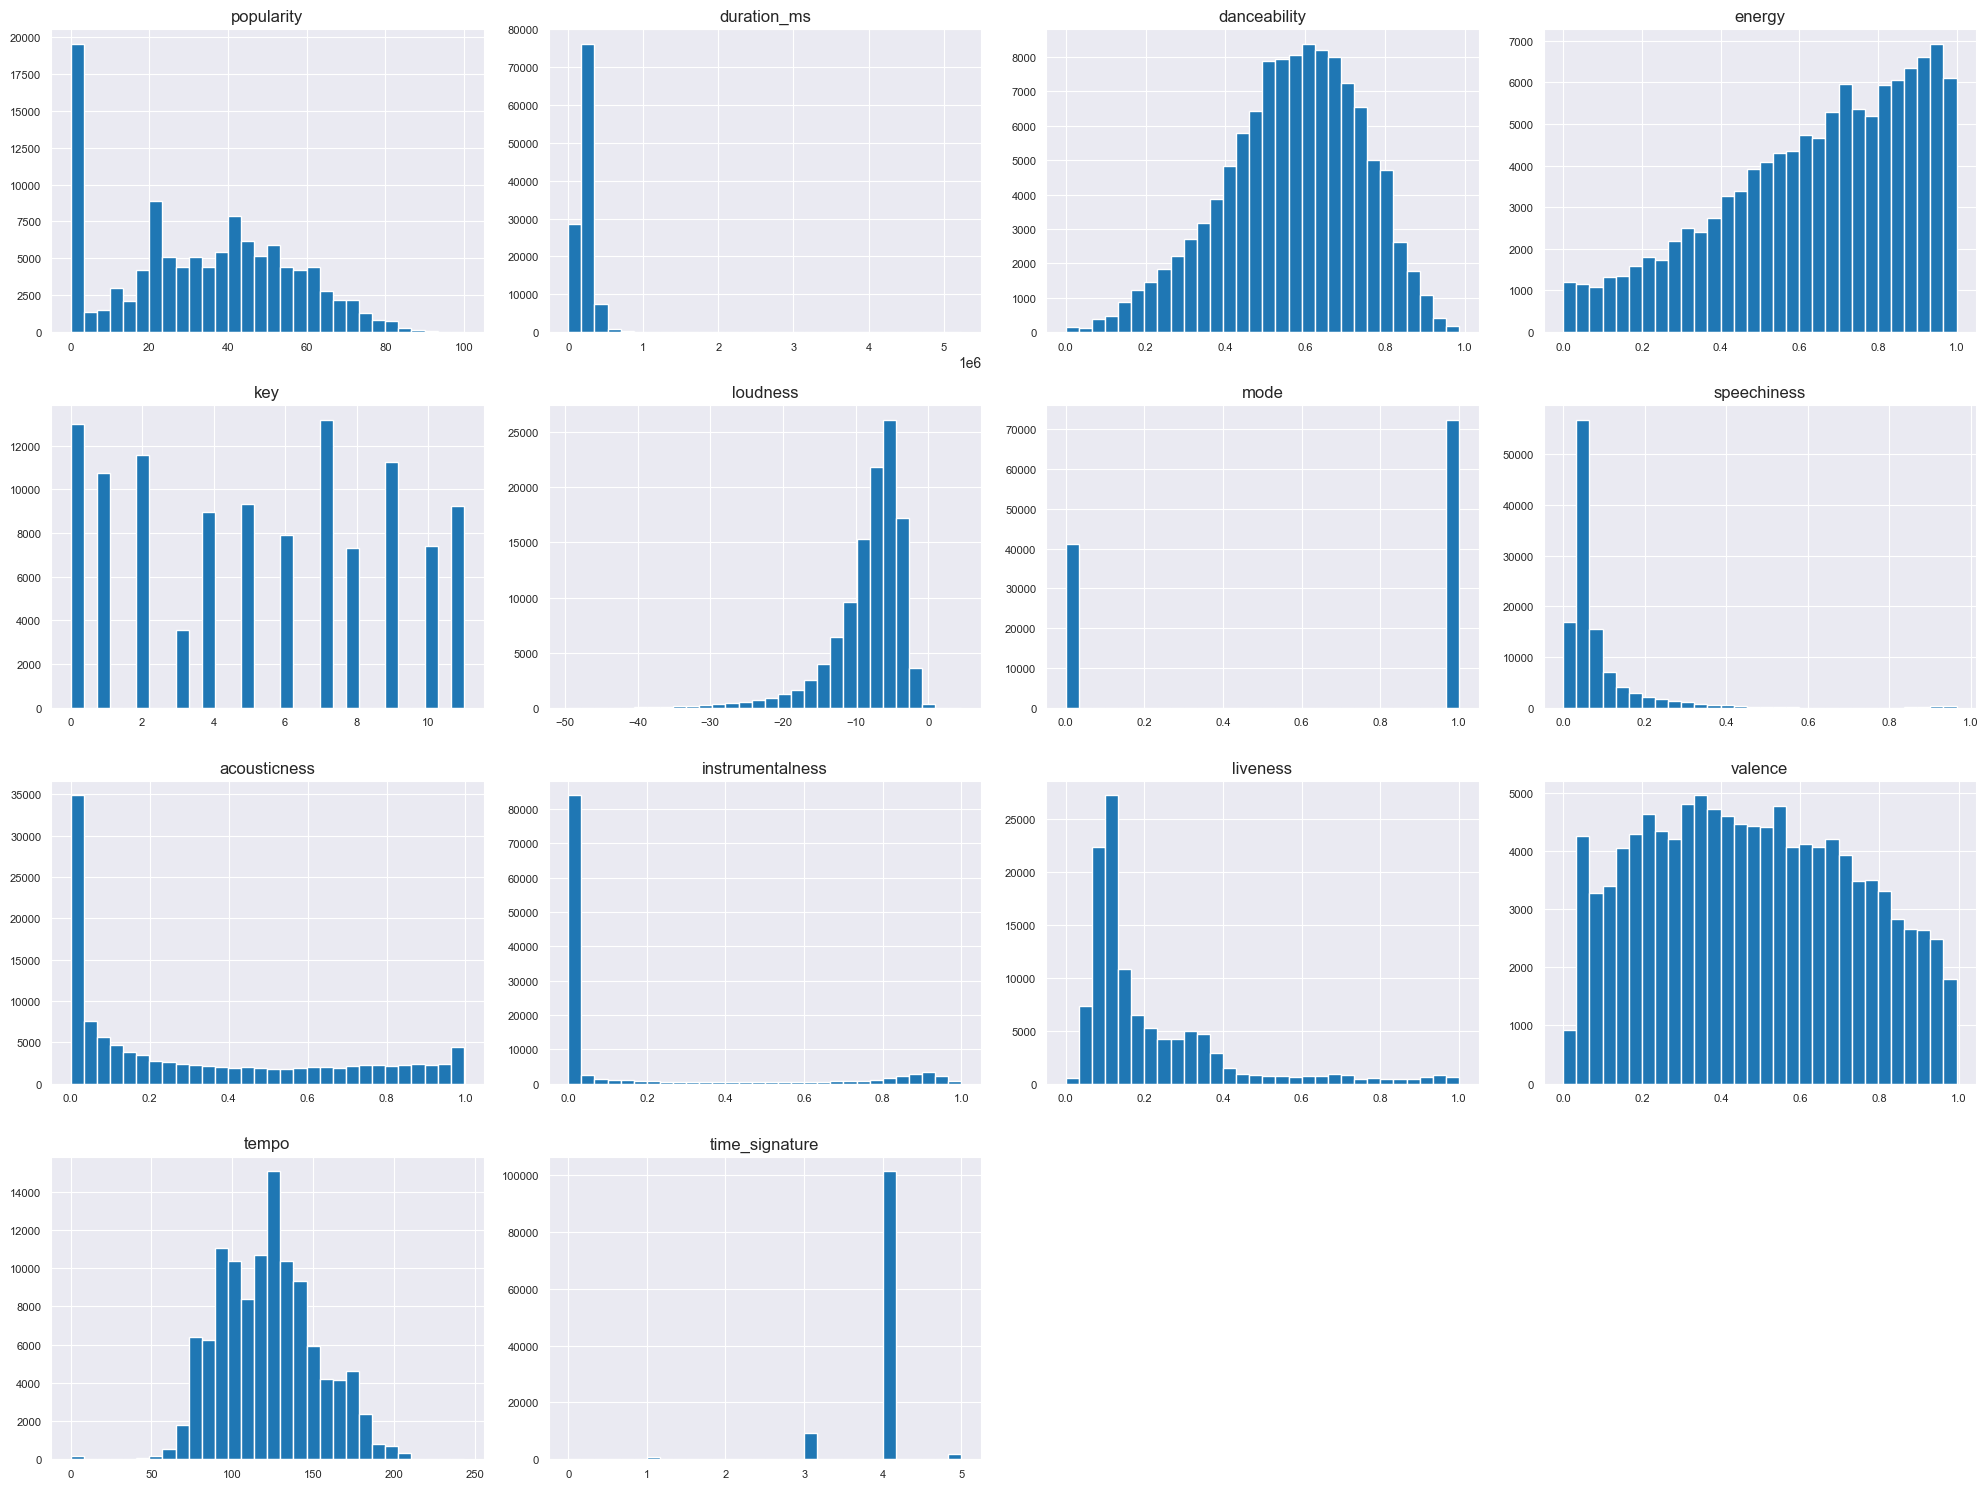

In [65]:
sns.set_style('darkgrid')
numerical_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

**Comment**

- The columns `danceability`, `tempo`, `valence` have distributions close to normal.
- The column `loudness` has a left-skewed distribution, mainly songs with noise levels ranging from -15 to -5 dB.
- The columns `speechiness`, `acousticness`, `instrumentalness`, and `liveness` have right-skewed distributions, mostly songs with low values.
- There are many songs with a `popularity` value of 0; the rest are close to a normal distribution.
- The `duration_ms` column has a right-skewed distribution, with most songs having a duration of less than 500,000 ms (8 minutes) and the longest around 5 million ms (83 minutes).
- The `energy` column has an increasing distribution from 0 to 1, mainly songs with values from 0.4 to 0.9.
- The `key` column has distinct values from 0 to 11, distributed fairly evenly.
- The `mode` column has 2 values, 0 and 1, with the value 1 dominating, almost double the value 0.
- The `time_signature` column has many songs with a value of 5 (majority).
- The columns `danceability`, `energy`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence` all have min = 0 and max = 1.


### 2.1.2 Distribution of a categorical column

We need to extract all categorical columns and store them in the variable `categorical_cols`

In [66]:
categorical_cols = df[df.columns[(df.dtypes == 'object') | (df.dtypes == 'bool')]]
categorical_cols.shape

(113550, 6)

There are 6 numerical columns, let's see 5 sample rows of them

In [67]:
categorical_cols.sample(5)

,track_id,artists,album_name,track_name,explicit,track_genre
61224,2RoQPsAz89XfmsYBvBQQhZ,Shiritsu Ebisu Chugaku,イヤフォン・ライオット,イヤフォン・ライオット,False,j-idol
35660,3TDrOzTljWe8FMdS6wPaC6,Thiago Jhonathan (TJ),Nasa,Nasa,False,forro
110313,7ydaic6O1E9pVrzQiXYDZt,Omiki,Devil in Me,Devil in Me,False,trance
4025,6TWcSqCntZhH5vyc35kkob,Cigarettes After Sex,Cigarettes After Sex,John Wayne,False,ambient
93285,5ugEAELzfwf3k07D3e1WNN,Владимир Бунчиков,Севастопольский Вальс (1943 - 1961),"Шумит волна, звенит струна",False,romance


#### What is the percentage of missing values?

To start our analysis, we first examined the categorical columns using the `info()` method.

In [68]:
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   track_id     113550 non-null  object
 1   artists      113549 non-null  object
 2   album_name   113549 non-null  object
 3   track_name   113549 non-null  object
 4   explicit     113550 non-null  bool  
 5   track_genre  113550 non-null  object
dtypes: bool(1), object(5)
memory usage: 5.3+ MB


We calculated the number of missing values and percentage of missing values for each categorical column.

In [69]:
dist_categorical_cols = pd.DataFrame(
    data = {
        'Missing Values': categorical_cols.isnull().sum(),
        'Missing Percentage': (categorical_cols.isnull().mean() * 100)
    }
)
dist_categorical_cols

,Missing Values,Missing Percentage
track_id,0,0.000000
artists,1,0.000881
album_name,1,0.000881
track_name,1,0.000881
explicit,0,0.000000
track_genre,0,0.000000


We will examine the rows with missing values to consider how to handle them

In [70]:
categorical_cols[categorical_cols.isnull().any(axis=1)]

,track_id,artists,album_name,track_name,explicit,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,False,k-pop


So, all three columns with missing values are in this particular row. We will proceed to drop that row

In [71]:
index_to_drop = df[categorical_cols.isnull().any(axis=1)].index
df.drop(index_to_drop, inplace=True)

print(f'Rows with missing values dropped. Updated DataFrame shape: {df.shape}')

Rows with missing values dropped. Updated DataFrame shape: (113549, 20)


**Concise statistics of categorical columns**

- `count`: the number of values in each column
- `unique`: the number of unique values
- `top`: the most frequently occurring value
- `freq`: the frequency

In [72]:
df.describe(include=['object', 'bool'])

,track_id,artists,album_name,track_name,explicit,track_genre
count,113549,113549,113549,113549,113549,113549
unique,89740,31437,46589,73608,2,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,False,acoustic
freq,9,279,195,151,103831,1000


**Observation:**
- Some tracks have multiple entries, as the count is higher than the unique 
- "The Beatles" is the top artist with a relatively high frequency.
- The top album is "Alternative Christmas 2022" with a frequency of 195.
- "Run Rudolph Run" is the most frequently occurring track name.
- The majority of tracks are not explicit (lyrics).
- "Acoustic" is the most frequent track genre.

### Visualize unique values

- Each song has a unique `track_id`, so visualizing it might not provide meaningful insights.
- Since `explicit` has only 2 unique values, we can visually analyze and explore the distribution of these values.
- For columns like `artists`, `album_name`, `track_name`, and `track_genre` with a considerable number of unique values, it's impractical to check them all. Therefore, we will visualize the top 10 most frequently occurring values in each column.

**Distribution of explicit**

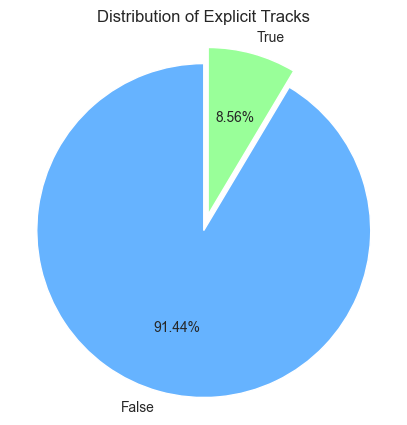

In [73]:
unique_values, value_counts = np.unique(categorical_cols['explicit'], return_counts=True)

fig, ax = plt.subplots(figsize=(5, 5))

# Explode the slice with explicit tracks for emphasis
explode = [0, 0.1]  # Only "yes" (true) will be slightly exploded
colors = ['#66b3ff','#99ff99']

ax.pie(value_counts, labels=unique_values, autopct='%1.2f%%', startangle=90, colors=colors, explode=explode)
ax.axis('equal')
ax.set_title('Distribution of Explicit Tracks')
plt.show()

- As shown in the pie chart, we can observe that the majority of tracks do not contain explicit lyrics (over 90%). 
- This trend may be attributed to considerations such as the avoidance of explicit content in lyrics, as well as cultural, societal, and regulatory factors associated with content release.
-  Artists and music producers may opt for cleaner content to appeal to a broader audience and comply with cultural norms and distribution regulations.

**Top of artists, album_name, track_name, track_genre**

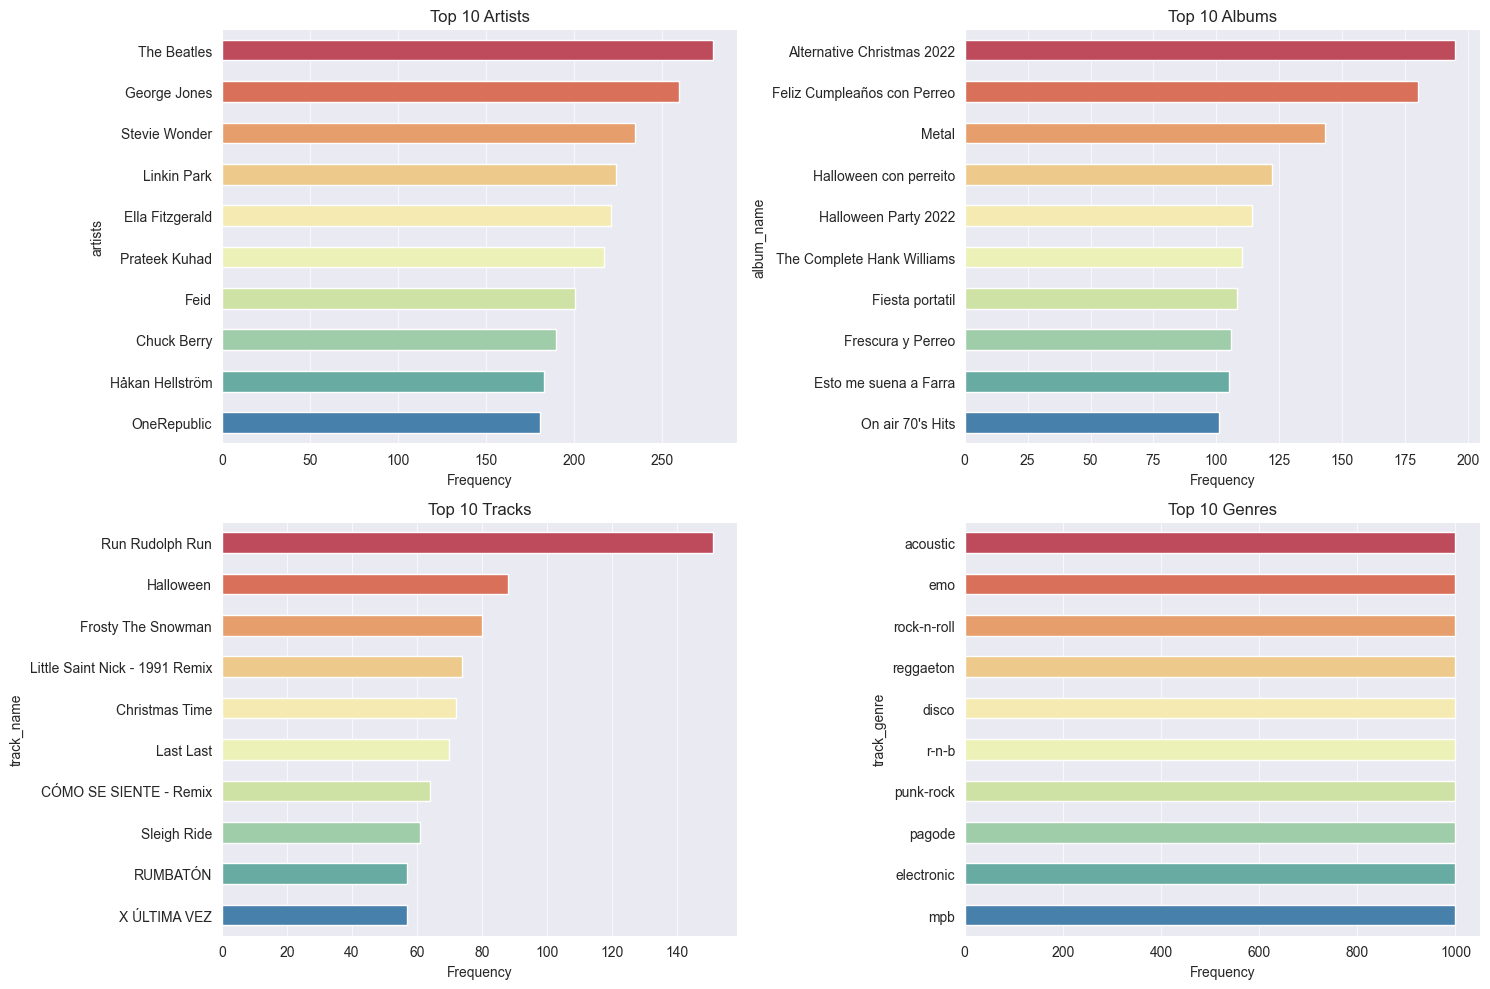

In [74]:
top_n = 10
sns.set_style('darkgrid')

# Get the top N most frequent artists, albums, tracks, and genres
top_artists = df['artists'].value_counts().head(top_n)
top_albums = df['album_name'].value_counts().head(top_n)
top_tracks = df['track_name'].value_counts().head(top_n)
top_genres = df['track_genre'].value_counts().head(top_n)

# Disable FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Top N Artists
    sns.barplot(x=top_artists.values, y=top_artists.index, palette="Spectral", ax=axes[0, 0], orient='h',  zorder=3, width=0.5)
    axes[0, 0].set_title(f'Top {top_n} Artists')
    axes[0, 0].set_xlabel('Frequency')
    axes[0, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Albums
    sns.barplot(x=top_albums.values, y=top_albums.index, palette="Spectral", ax=axes[0, 1], orient='h', zorder=3, width=0.5)
    axes[0, 1].set_title(f'Top {top_n} Albums')
    axes[0, 1].set_xlabel('Frequency')
    axes[0, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Tracks
    sns.barplot(x=top_tracks.values, y=top_tracks.index, palette="Spectral", ax=axes[1, 0], orient='h', zorder=3, width=0.5)
    axes[1, 0].set_title(f'Top {top_n} Tracks')
    axes[1, 0].set_xlabel('Frequency')
    axes[1, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Genres
    sns.barplot(x=top_genres.values, y=top_genres.index, palette="Spectral", ax=axes[1, 1], orient='h', zorder=3, width=0.5)
    axes[1, 1].set_title(f'Top {top_n} Genres')
    axes[1, 1].set_xlabel('Frequency')
    axes[1, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    plt.tight_layout()
    plt.show()


**Comment**

- The top 10 artists are all renowned, with "The Beatles" being the most popular.
- The dataset was collected in October 2022, so the top album and top track name are Halloween-themed and Christmas-themed, respectively.
- The top 10 track genres are all popular genres, and they all appear with the same frequency (frequency = 1000).


# 3. Abnormal values and outliers

We can observe that the distribution as well as the range of values in the numerical columns are **no abnormal values** so we will check outliers for some columns. We will use boxplot to visualize outliers

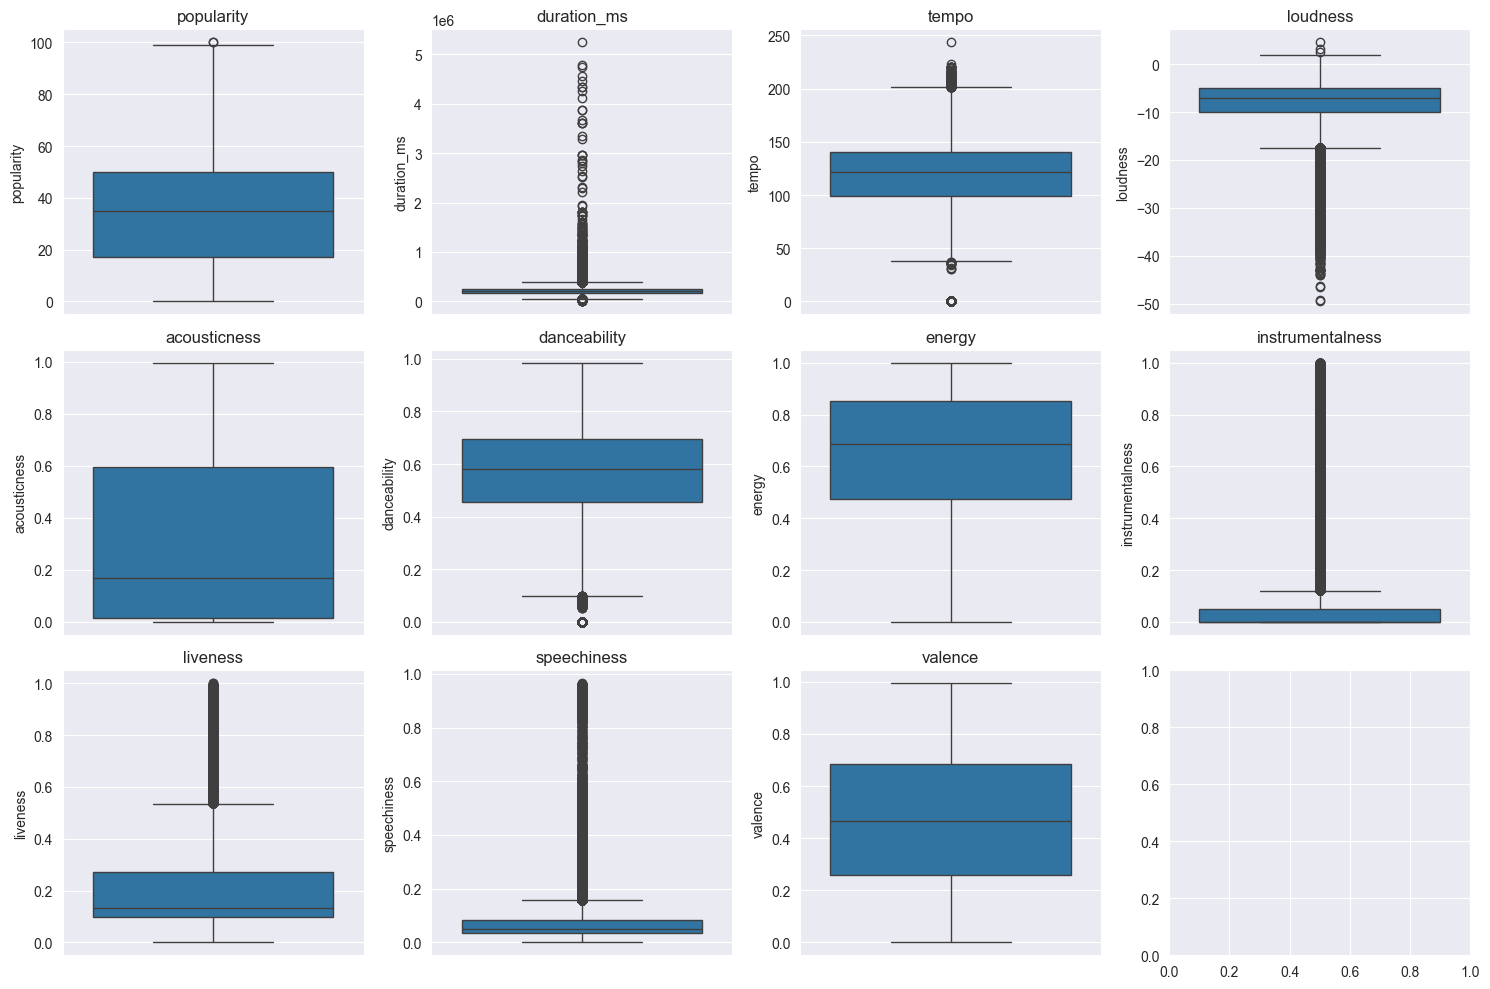

In [75]:
# boxplot for numerical columns
sns.set_style('darkgrid')
columns = ['popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=numerical_cols, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

**Comment**

- `popularity`, `acousticness`, `energy`, `valence` have no outliers. (The `popularity` column has 1 outlier, but it is not significant.)
- The remaining columns exhibit a substantial number of outliers, which is understandable as they are all continuous variables. These variables have a wide range of values, do not follow a normal distribution, and are influenced by various factors of a song. Therefore, it is justifiable not to remove these outliers, as they contribute to the diversity and complexity of the dataset, reflecting the diverse nature of musical attributes.

# 4. Correlation between variables

We will use the `corr()` method to calculate the correlation between numerical columns and visualize it using a heatmap

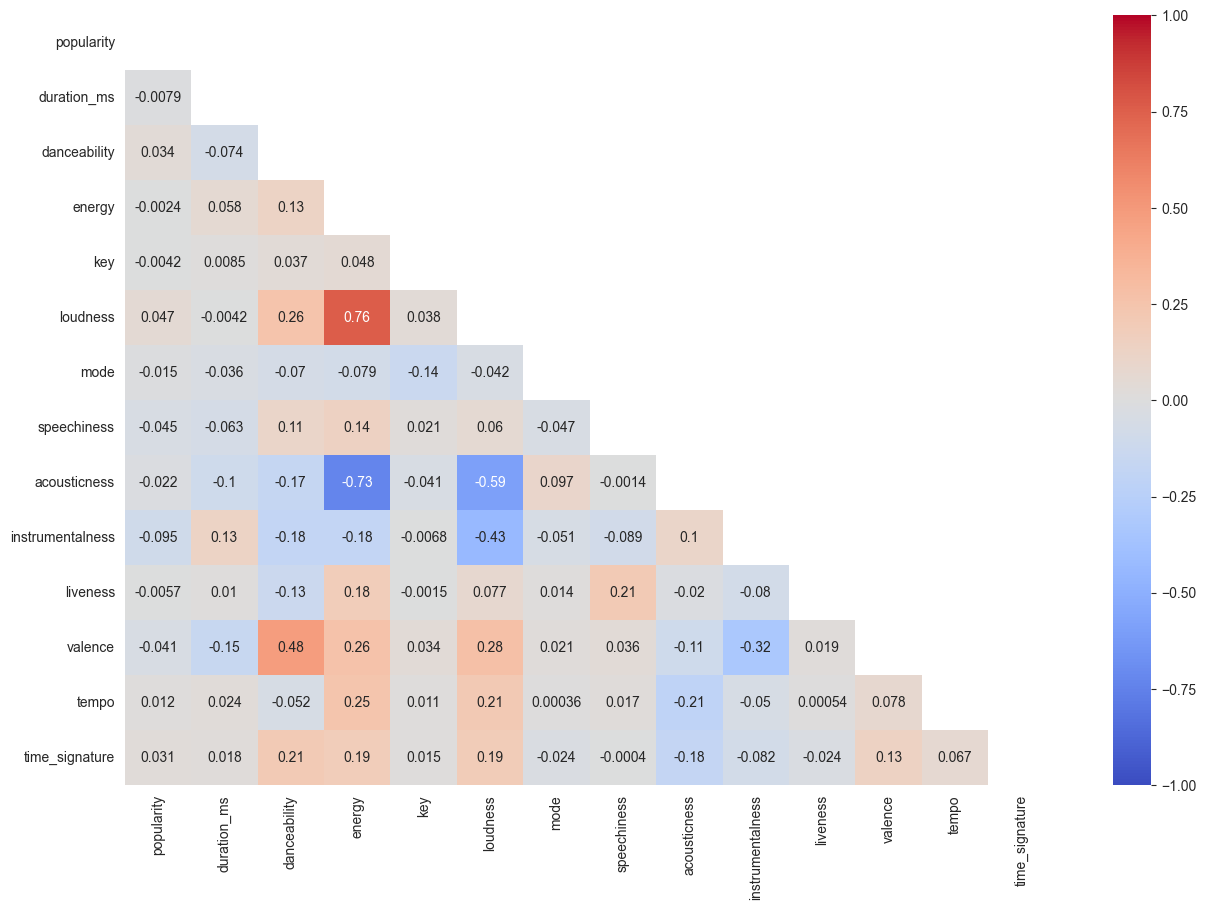

In [76]:
# heatmap for correlation
corr = numerical_cols.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set_style('white')
plt.figure(figsize=(15, 10))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

**Comment**

- The majority of columns exhibit very low correlation with each other, with magnitudes below 0.1.
- The columns with the highest correlation are `energy` and `loudness` with a correlation of 0.76, `loudness` and `acousticness` with a correlation of -0.59, and `energy` and `acousticness` with a correlation of -0.73. This is understandable as the energy of a song is inversely proportional to its acousticness, and the loudness of a song is directly proportional to its energy.
- `popularity` has a low correlation with all other variables, which is understandable as popularity is a subjective measure influenced by factors such as the artist's popularity, release date, and genre.
- `instrumentalness` and `loudness` have a negative correlation of -0.43, which is understandable as instrumental songs tend to be quieter than songs with vocals.
- `danceability` and `valence` have a correlation of 0.43, which is understandable as songs with high valence (positiveness) are more likely to be danceable.

# 5. Summary

# 6. Save the cleaned dataset

In [77]:
df.to_csv('data/cleaned_dataset.csv', index=False)